<font color = 'purple'><h1>FRC Analytics with Python - Session 09</h1> </font>
<font color = 'purple'><h1>Tabular Data</h1> </font>
<font color='purple'>**Last Updated: 21 December 2020**</font> 

<font color = 'purple'><h2>I. Introduction</h1></font>
<font color='#10C2AF'>Graphing is an integral part of data science, data analytics, and data visualization. It allows easier and more efficient interpretation when data is plentiful. Graphing and visualization is an important skill which is used widely in the professional world. 
In FRC, we analyze team performance by graphing scouting data which helps us evaluate the strengths and weaknesses of all robots at the competition! </font> 


<font color = 'purple'><h2>II. Import and Structure data</h1></font>
<font color='#10C2AF'><h2> A. Make a Pandas DataFrame</font> 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
house = pd.read_csv("housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<font color='#10C2AF'>In the last session, we went over the basics of pandas. This week, we will explore two more libraries called matplotlib and numpy. Pandas is used to format the data, which allows matplotlib and numpy to further analyze and visualize the data.  </font>

In [20]:
house.drop(columns =['longitude', 'latitude', 'ocean_proximity']) 

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


<font color = 'purple'><h2>II. Plotting</h1></font>
<font color='#10C2AF'><h2> A. Curate Data</font> 

In [21]:
mhv = list()
mhi = list()
for i in range(0, len(house)):
    if(i % 200 == 0):
        mhv.append(house['median_house_value'][i])
        mhi.append(house['median_income'][i] * 10000)

<font color='#10C2AF'> 
In the cell above, we appended every 200th row of median house value and median income from the pandas dataframe to their respective lists. In the next cell, the first 10 items of each list are printed. We chose every 200th row because it simplifies the data to allow the user to see a cleaner trend while still maintaining the deviation between points.
</font> 

In [22]:
print(mhv[:10])
print(mhi[:10])

[452600.0, 80800.0, 261300.0, 223200.0, 157600.0, 184400.0, 63900.0, 186400.0, 257100.0, 93800.0]
[83252.0, 30257.0, 42614.0, 30000.0, 24808.0, 33841.0, 19100.0, 47386.0, 41250.0, 11250.0]


<font color='#10C2AF'><h2> B. Code the Graphs</font> 


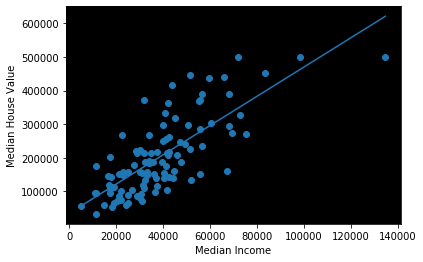

In [23]:
scatterboi = plt.scatter(mhi, mhv) #creates a scatterplot object. The first parameter is the x-axis variable and the second parameter is the y-axis variable. 
plt.xlabel("Median Income") #label for the x-axis
plt.ylabel("Median House Value") #label for the y-axis
plt.plot(np.unique(mhi), np.poly1d(np.polyfit(mhi, mhv, 1))(np.unique(mhi))) #draws a line of best fit from the data points
ax = plt.gca() # gets an instance of the current axes (so everything that is in black is an object)
ax.set_facecolor('#000000') #colors the background of the object we created in the last line

<font color='#10C2AF'> 
This is a scatterplot with Median Income on the x-axis and Median House Value on the y-axis. It uses numpy to draw a line of best fit which makes it easier to visualize the data trend. It makes a line of best fit by testing the squares of the distances between the line and points on the scatterplot. It finally makes a line of best fit that minimizes the square of the distances. 
</font> 

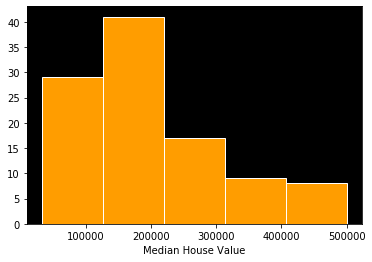

In [24]:
plt.hist(mhv, bins = 5, color = '#ff9d00', edgecolor = 'w') 
plt.xlabel("Median House Value")
ax = plt.gca()
ax.set_facecolor('#000000')

<font color='#10C2AF'> 
In the cell above, we created a histogram of median house value. The parameters for .hist() in the example above are the list of data we want to graph, the number of bars we want to categorize the data in, the color of the bars, and the color of the outline of the bars.
</font>

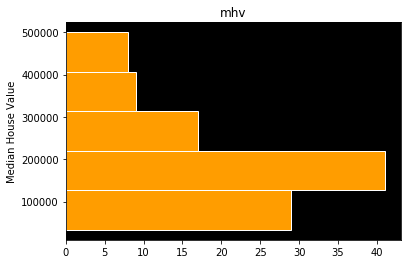

In [25]:
plt.hist(mhv, bins = 5, color = '#ff9d00', edgecolor = 'w', orientation = 'horizontal') #thy last parameter makes the bar graph orient horizontally
plt.ylabel("Median House Value")
plt.title("mhv") #this adds the 'mhv' title to the graph
ax = plt.gca()
ax.set_facecolor('#000000')

In [26]:
labels = '0 to 100k', '100k to 200k', '200k to 300k', '300k to 400k', '400k to 500k'
one = 0
two = 0
three = 0
four = 0
five = 0
for i in range(len(mhv)):
    if(mhv[i] > 400000):
        five += 1
    elif(mhv[i] > 300000):
        four += 1
    elif(mhv[i] > 200000):
        three += 1
    elif(mhv[i] > 100000):
        two += 1
    elif(mhv[i] > 0):
        one += 1
    
data = [one, two, three, four, five]

<font color='#10C2AF'> 
In the cell above, we had to manually process the data by categorizing into 5 categories. In each if-block, we added 1 to the corresponding category's variable to count the amount of data per category. Then, we loaded all the variables into a list called data for the next cell.
</font> 

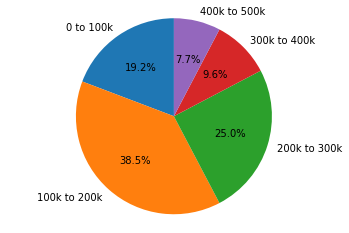

In [30]:
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

<font color='#10C2AF'> 
 
</font> 

<font color='#10C2AF'> 
The pie chart in the cell above is created using the labels and the corresponding data from the prior cell. In ax1.pie(), the first parameter is the data, and the second specification is the respective labels. The autopct='%1.1f%%' specifies the percentage each category takes up on the pie chart and the start angle, which is set to 90, sets the division between 2 sectors of the chart to point directly North of the chart. This is just for visual appeal and has no logical impact on how the data is presented.
</font> 